In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
time_data = np.load('time_data.npy', allow_pickle=True).item()

In [3]:
master_time = time_data['time'] + time_data['time_usec'] / 1_000_000  # Master time: 100Hz
ctime = lambda r: time_data[f'roach{r}_time']  # Roach time: 476.5Hz

In [4]:
roaches = (1, 2, 3, 4, 5)
# time = 0.05244  # Seconds
time = 0.05246  # Seconds
print(f'{len(master_time)=}')
for roach in roaches:
    starting_tdiff = master_time[int(time * 100)] - ctime(roach)[int(time * 476.5)]
    print(f'{roach=}, {starting_tdiff=}')

# Roach 3 is 5 seconds off until the 25th index, then it matches?

len(master_time)=9830900
roach=1, starting_tdiff=np.float64(-42.17490291595459)
roach=2, starting_tdiff=np.float64(-42.35490298271179)
roach=3, starting_tdiff=np.float64(-37.54666304588318)
roach=4, starting_tdiff=np.float64(-42.272854804992676)
roach=5, starting_tdiff=np.float64(-42.332854986190796)


In [5]:
for roach in roaches:
    isnan = np.isnan(ctime(roach))
    # plt.plot(isnan)
    # plt.show()
    nan_ct = np.count_nonzero(isnan)
    print(f'{roach=}, {nan_ct=}, NaN%={100*nan_ct/len(isnan):.4f}')

roach=1, nan_ct=627, NaN%=0.0013
roach=2, nan_ct=52998, NaN%=0.1139
roach=3, nan_ct=0, NaN%=0.0000
roach=4, nan_ct=0, NaN%=0.0000
roach=5, nan_ct=45248, NaN%=0.0972


In [6]:
master_diff = np.diff(master_time)
master_dt = np.nanmean(master_diff)
print(f'master time, {master_dt=}, {1/master_dt=}')
for roach in roaches:
    diff = np.diff(ctime(roach))
    dt = np.nanmean(diff)
    print(f'{roach=}, {dt=}, {1/dt=}')

master time, master_dt=np.float64(0.010000020078320739), 1/master_dt=np.float64(99.99979921719574)
roach=1, dt=np.float64(0.002100406674123139), 1/dt=np.float64(476.098277690663)
roach=2, dt=np.float64(0.0020985517512356017), 1/dt=np.float64(476.5191039064022)
roach=3, dt=np.float64(0.0020985746722360153), 1/dt=np.float64(476.51389928122387)
roach=4, dt=np.float64(0.0020986398836746814), 1/dt=np.float64(476.4990924736538)
roach=5, dt=np.float64(0.0020986436085360595), 1/dt=np.float64(476.49824674021954)


In [7]:
slice_i = {1:37125750, 3:37141250}  # already determined by James

print('Roach 1, 1st sliced timestamp: ' + str(ctime(1)[slice_i[1]]))
print('Roach 1, 2nd sliced timestamp: ' + str(ctime(3)[slice_i[3]]))

Roach 1, 1st sliced timestamp: 1578321114.2931795
Roach 1, 2nd sliced timestamp: 1578321152.9689555


In [17]:
rtime = lambda r: time_data[f'roach{r}_time'] - 1578244880.069792 # Relative Roach time: 476.5Hz

print(f'{master_time[0]=}, {master_time[-1]=}, timespan={master_time[-1] - master_time[0]}')
for roach in roaches:
    print(f'{rtime(roach)[0]=}, {rtime(roach)[-1]=}, timespan={rtime(roach)[-1] - rtime(roach)[0]}')

master_time[0]=np.float64(1578244880.069792), master_time[-1]=np.float64(1578343189.25718), timespan=98309.18738794327
rtime(roach)[0]=np.float64(42.08502388000488), rtime(roach)[-1]=np.float64(97736.52020788193), timespan=97694.43518400192
rtime(roach)[0]=np.float64(42.265023946762085), rtime(roach)[-1]=np.float64(97687.02020788193), timespan=97644.75518393517
rtime(roach)[0]=np.float64(37.510032176971436), rtime(roach)[-1]=np.float64(97687.61020803452), timespan=97650.10017585754
rtime(roach)[0]=np.float64(42.18297576904297), rtime(roach)[-1]=np.float64(97687.97020792961), timespan=97645.78723216057
rtime(roach)[0]=np.float64(42.24297595024109), rtime(roach)[-1]=np.float64(97687.12020802498), timespan=97644.87723207474


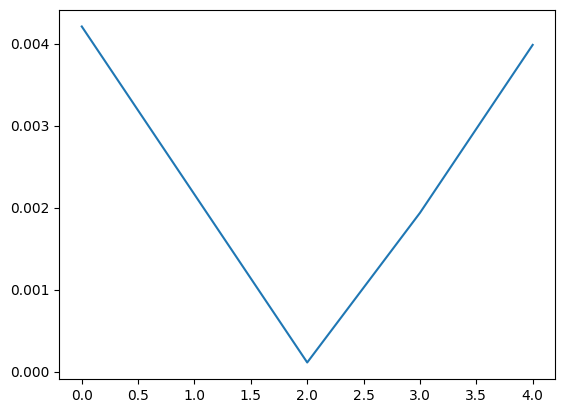

In [45]:
rcw92_start = 1578323350.770619
rcw92_end = 1578324441.3818192

sliced = ctime(2)[38_212_940:38_212_945]

diff = np.abs(sliced - rcw92_start)
plt.plot(diff)
plt.show()
# closest_index = np.argmin()
# ltltctime(2)[closest_index-1]

In [46]:
x_um = np.load('roach2_x_um.npy', allow_pickle=True)
y_um = np.load('roach2_y_um.npy', allow_pickle=True)

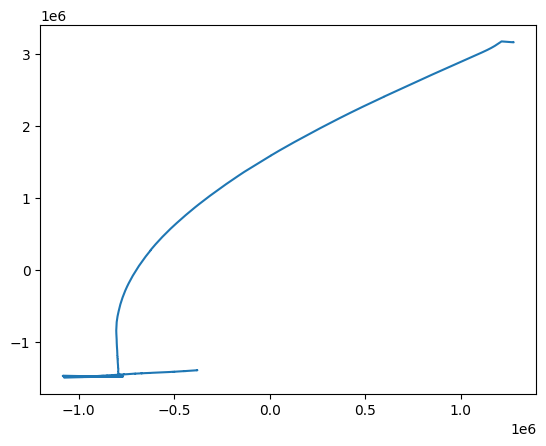

In [65]:
# plt.plot(x_um, y_um)
# plt.show()

start_cutoff = 100000
end_cutoff = -100000
plt.plot(x_um[start_cutoff:end_cutoff], y_um[start_cutoff:end_cutoff])
plt.show()